# Serie 02

## Aufgabe 2.1

a.) Ich habe die erste Note um 3.2 und die letzten beiden Noten um 2 verändert. Dies führt zu einer Verschiebung der Daten im Datensatz.

In [23]:
from pandas import Series, DataFrame 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

x = Series([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 
            6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 
            5.5, 4.2, 4.9, 5.1])

print("Mean: " +str(x.mean()))
print("Median: "+str(x.median()))

x[0] = 1
x[x.size-1] = 6
x[x.size-2] = 6

print("Mean: " + str(x.mean()))
print("Median: " + str(x.median()))

Mean: 4.5125
Median: 4.65
Mean: 4.4624999999999995
Median: 4.65


---
b.) Der Median ist im Boxplot gut ersichtlich und befindet sich wenig höher als 4.5. 

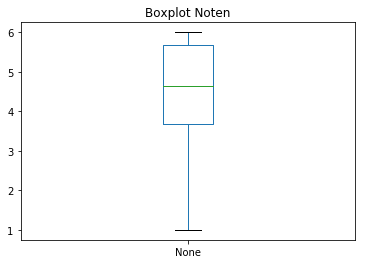

In [24]:
x.plot(kind="box", title="Boxplot Noten")

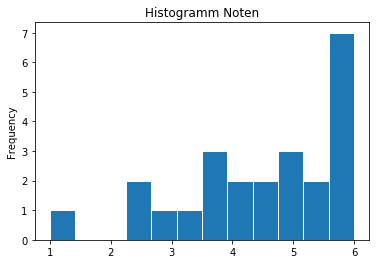

In [25]:
x.plot(kind="hist", bins=12, title="Histogramm Noten", edgecolor="white")

---
## Aufgabe 2.2

In [26]:
schlamm = pd.read_table(r"klaerschlamm.dat", sep=" ", index_col=0)

schlamm = schlamm.drop("Labor",1)
schlamm.head()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
1,233,491,428,376,200,364,474,444,351
2,253,530,453,389,191,402,495,453,371
3,240,530,460,390,200,390,480,440,350
4,243,518,456,389,186,385,483,459,369
5,244,521,446,392,193,385,481,451,357


---
a.) Ausreisser bei allen, ausser bei Pr5 (grosse Ausreisser bei Pr7 und Pr9). Mittel und Median unterscheiden sich wesentlich bei Pr1, Pr2, Pr6, Pr7 und Pr9 (<10). Bei Probe 5 ist es auf jeden Fall plausibel, dass die wahre Konzentration unter 400 mg/kg liegt.

In [27]:
schlamm.describe().loc[["mean","50%"]].round()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
mean,246.0,511.0,443.0,389.0,188.0,395.0,466.0,450.0,389.0
50%,244.0,521.0,446.0,390.0,188.0,385.0,481.0,451.0,369.0


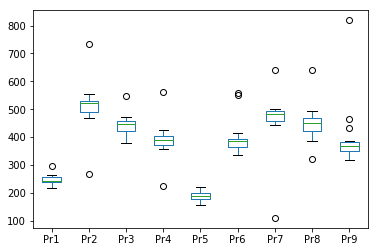

In [28]:
schlamm.plot(kind="box")

---
b.) Die Proben 15 und 21 habe hohe "normale" Beobachtungen. Sie enthalten auch systematische Fehler. 1, 7, 12, 13, 14, 17, 18, 20, 21 beinhalten auch zu tiefe Messwerte. 6, 8, 10 und 15 und 16 zeigen zu hohe Werte an.

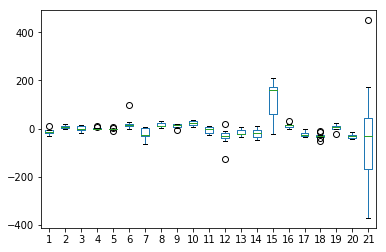

In [29]:
schlamm_centered = schlamm - schlamm.median()
schlamm_centered.T.plot(kind="box")

## Aufgabe 2.3

In [30]:
???

Object `` not found.


## Aufgabe 2.4

In [33]:
hubble = pd.read_table("hubble.txt", sep=" ")
hubble.head()

,distance,recession.velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


---
a.) x-axis: Distance of Galaxy to Earth, y-axis: Recession Velocity

Text(0,0.5,'Recession Velocity')

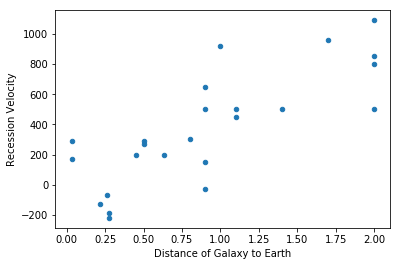

In [36]:
hubble.plot(kind="scatter", x="distance", y="recession.velocity")
plt.xlabel("Distance of Galaxy to Earth")
plt.ylabel("Recession Velocity")

---
b.) Regressionsgerade wird gesucht. Dies erreicht man mit der polyfit und linspace Methoden von numpy.

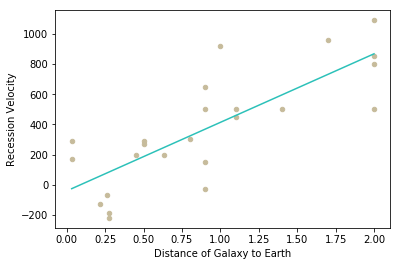

In [58]:
hubble.plot(kind="scatter", x="distance", y="recession.velocity", c="#c6bb9b")

b, a = np.polyfit(hubble['distance'], hubble['recession.velocity'], deg=1)
x = np.linspace(hubble['distance'].min(), hubble['distance'].max())

plt.plot(x, a+b*x, c='#2cc1b9')

plt.xlabel("Distance of Galaxy to Earth")
plt.ylabel("Recession Velocity")

plt.show()

c.) Die Korrelation könnte höher sein ist jedoch plausibel mit 0.79.

In [59]:
hubble.corr()

,distance,recession.velocity
distance,1.000000,0.789639
recession.velocity,0.789639,1.000000


## Aufgabe 2.5

a.) Streudiagramme:

In [61]:
income = pd.read_table("income.dat", sep=" ")
income.head()

,AFQT,Educ,Income2005
0,6.841,12,5500
1,99.393,16,65000
2,47.412,12,19000
3,44.022,14,36000
4,59.683,14,65000


Text(0,0.5,'Income in 2005')

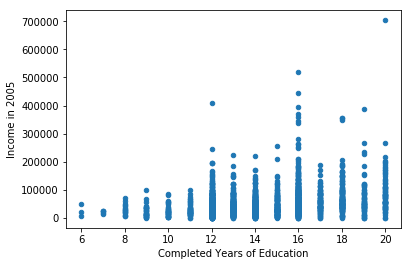

In [67]:
income.plot(kind='scatter', x='Educ', y='Income2005')
plt.xlabel('Completed Years of Education')
plt.ylabel('Income in 2005')

Text(0,0.5,'Intelligence Quotient')

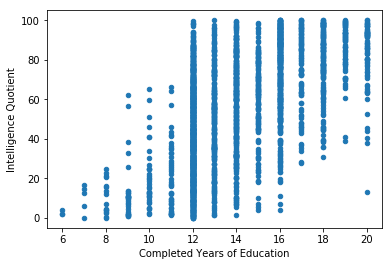

In [69]:
income.plot(kind='scatter', x='Educ', y='AFQT')
plt.xlabel('Completed Years of Education')
plt.ylabel('Intelligence Quotient')

---
b.) Der Parameter a ist der Achsenabschnitt und b ist die Steigung. Die Werte sind a = -40'199.575 / 21181.657 und b = 6451.475 / 518.682. 

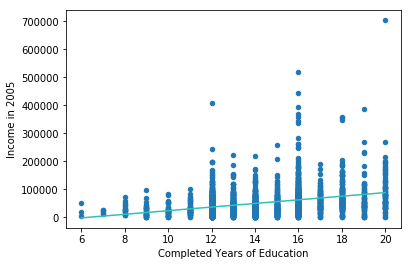

In [73]:
income.plot(kind='scatter', x='Educ', y='Income2005')


b, a = np.polyfit(income['Educ'], income['Income2005'], deg=1)
x = np.linspace(income['Educ'].min(), income['Educ'].max())

plt.plot(x, a+b*x, c='#2cc1b9')

plt.xlabel('Completed Years of Education')
plt.ylabel('Income in 2005')

plt.show()

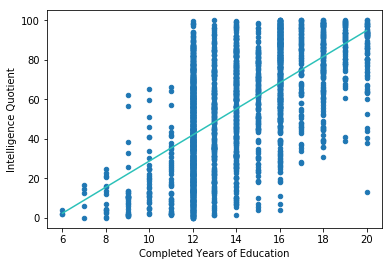

In [80]:
income.plot(kind='scatter', x='Educ', y='AFQT')


b, a = np.polyfit(income['Educ'], income['AFQT'], deg=1)
x = np.linspace(income['Educ'].min(), income['Educ'].max())

plt.plot(x, a+b*x, c='#2cc1b9')

plt.xlabel('Completed Years of Education')
plt.ylabel('Intelligence Quotient')

plt.show()

In [81]:
b, a = np.polyfit(income["AFQT"], income["Income2005"], deg=1) 
print(a, b)

21181.656863527787 518.68207901959


In [82]:
b, a = np.polyfit(income["Educ"], income["Income2005"], deg=1) 
print(a, b)

-40199.575352599866 6451.4745559457815


---
c.) Die Korrelation beträgt ca. 0.3456, weshalb Vorsicht geboten ist bei der Anwendung dieser Daten.

In [83]:
income.corr().iloc[1,2]

0.3456474135981061

## Aufgabe 2.6

a.) Die Subplots 3 und 4 sind beinahe linear mit wenigen Ausreissern, wobei die Subplots 1 und 2 eher eine höhere Streuung haben.

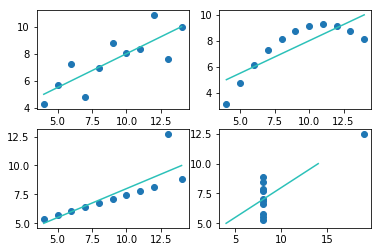

In [159]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]) 
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]) 
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]) 
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

plt.subplot(221)
plt.scatter(x,y1)
b, a = np.polyfit(x, y1, deg=1)
z = np.linspace(x.max(), x.min())

plt.plot(z, a+b*z, c='#2cc1b9')

plt.subplot(222)
plt.scatter(x,y2)
b, a = np.polyfit(x, y2, deg=1)
z = np.linspace(x.max(), x.min())

plt.plot(z, a+b*z, c='#2cc1b9')

plt.subplot(223)
plt.scatter(x,y3)
b, a = np.polyfit(x, y3, deg=1)
z = np.linspace(x.max(), x.min())

plt.plot(z, a+b*z, c='#2cc1b9')

plt.subplot(224)
plt.scatter(x4,y4)
b, a = np.polyfit(x4, y4, deg=1)
z = np.linspace(x.max(), x.min())

plt.plot(z, a+b*z, c='#2cc1b9')

---
b.) Der 3. Subplot hat rein von der Beobachtung her die grösste Korrelation zwischen x und y (mit einem Ausreisser). Der 4. Subplot weist gar keine Korrelation auf, wobei die Nummer 1 und 2 schwieriger sind zu analysieren bezogen auf die Korrelation.

---

c.) Die Korrelation ist bei allen Arrays gleich, was beweist, dass die Korrelation nicht immer aussagekräftig ist.

In [160]:
np.corrcoef(x,y1)

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [161]:
np.corrcoef(x,y2)

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

In [162]:
np.corrcoef(x,y3)

array([[1.        , 0.81628674],
       [0.81628674, 1.        ]])

In [163]:
np.corrcoef(x4,y4)

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])